# Custom Shazam
## Download songs

Now we will gather audio data to play with it and get used to it

In [23]:
SONGS = [
    'https://www.youtube.com/watch?v=FATTzbm78cc',
    'https://www.youtube.com/watch?v=dQw4w9WgXcQ&list=PLahKLy8pQdCM0SiXNn3EfGIXX19QGzUG3',
    'https://www.youtube.com/watch?v=GgwUenaQqlM',
    'https://www.youtube.com/watch?v=M9xMuPWAZW8'
]

In [24]:
import os 
from tqdm import tqdm # for the progress bar

os.makedirs('data', exist_ok=True)

In [27]:
def download_song(i, url):
    os.system(f'youtube-dl -o "./data/{i}.%(ext)s" -x --audio-format mp3 {url}')    
    # youtube-dl -x --audio-format mp3 https://www.youtube.com/watch?v=jwD4AEVBL6Q

    
pbar = tqdm(len(SONGS))
for i, song in enumerate(SONGS):
    download_song(i, song)


0it [00:00, ?it/s]

In [28]:
!ls data

0.mp3  1.mp3  2.mp3  3.mp3


In [29]:
# listen to the song 
from IPython.display import Audio
Audio('data/3.mp3')

0it [01:52, ?it/s]


## Show spectogram

We know will use librosa to show some plots of the song including the spectogram

/home/taro/shazam/env/lib/python3.8/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


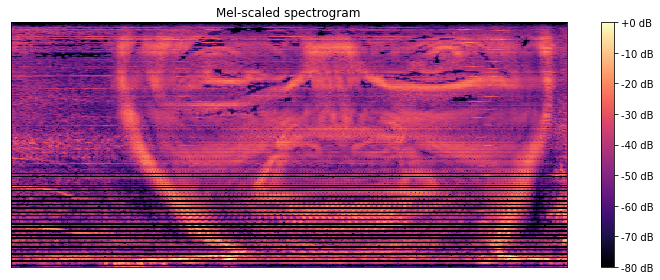

/home/taro/shazam/env/lib/python3.8/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


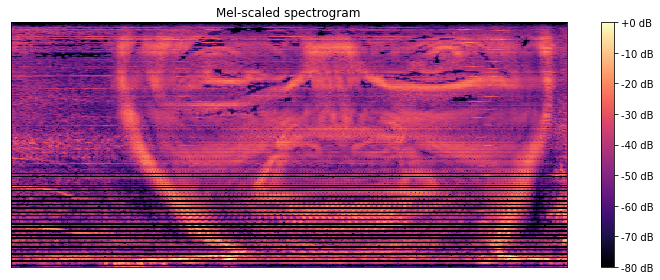

/home/taro/shazam/env/lib/python3.8/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


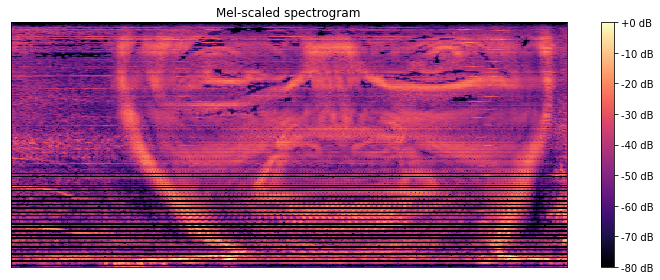

/home/taro/shazam/env/lib/python3.8/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


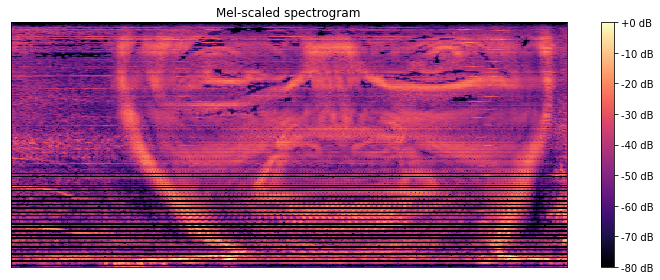

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from pydub import AudioSegment
import librosa.display
import librosa
from tqdm import tqdm
import os

def convert_mp3_to_wav(mp3_file):
    # For this you need to have installed ffmpeg, if you do not have it, convert manually the mp3 to wav
    mp3_audio = AudioSegment.from_file(mp3_file, format="mp3")  # read mp3
    #mp3_audio = mp3_audio[330970:339900] # select some seconds, it is in miliseconds 
    mp3_audio.export('temp.wav', format="wav")  # convert to wav
    
    
def reading_song(mp3_file):
    convert_mp3_to_wav(mp3_file)
    plt.figure(figsize=(10, 4))
    y, sr = librosa.load("temp.wav")
    S= librosa.feature.melspectrogram(y=y, sr=sr, n_mels=1000)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-scaled spectrogram')
    plt.tight_layout()
    plt.show()


for song in os.listdir('./data'):
    reading_song(os.path.join('./data', song))

## Generate hash
https://github.com/itspoma/audio-fingerprint-identifying-python